## Rebeca Abigail Mendoza Farías
## Carreer: Engineering in Intelligent systems
## Generation: 2020, ID:281612, Faculty ID: 202012300219
## Matter: Machine Learning, Group: 281601

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.linalg import pinvh
from sklearn.kernel_approximation import RBFSampler

DATA_PATH_TRUE = '../dataset/DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = '../dataset/DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = '../dataset/DS-5-1-GAP-5-1-N-3_v2.csv'
d_true = pd.read_csv(DATA_PATH_TRUE,header=None)
d_noise1 = pd.read_csv(DATA_PATH_NOISE1,header=None)
d_noise2 = pd.read_csv(DATA_PATH_NOISE2,header=None)


C:\Users\juanq\AppData\Local\Temp\ipykernel_10092\2717748317.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


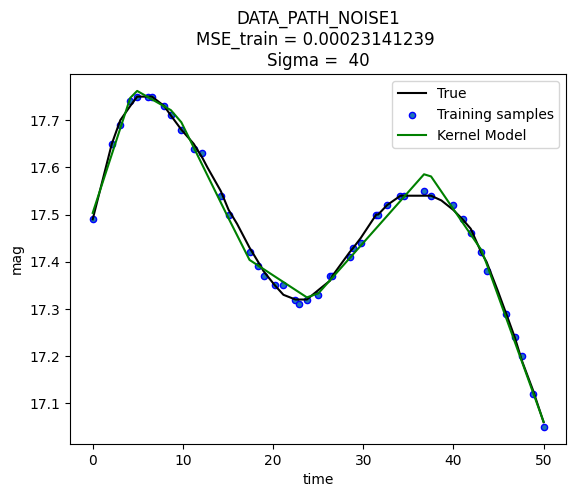

(50,)
(45,)


In [12]:
X = d_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y.values.reshape(-1,1) #X[:, np.newaxis]

X_test = d_true[0]
Y_test = d_true[1]
x_test = X_test.values.reshape(-1,1) #x_test = X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1) #y_test = Y_test[:, np.newaxis]
sigma=40

ones = []
for i in range(0,Y.size):
  ones.append(1)

#Do an array of ones
ones1 = np.array(ones)

#make de function K1 where
#ex = data time
#n = number of points
#c = Centers of gaussians
#k = number of kernels
#d = kernels width
def K1(ex,n,c,km,d):
  matrix = [[0 for _ in range(n)] for _ in range(km)]
  for i in range(0,km):
    for j in range (0,n):
      matrix[i][j] = m.exp(-(abs(ex[j]-c[i]**2)/(d[j]**2))) #the kernel function
  return matrix

#First Step: make the Gran_Matrix
Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
#This function returns a Matrix instead an array
Gram_matrix_M = np.asarray(Gram_matrix)

#The pseudo inverse of the matrix wiht the function np.linalg.pinv
#gettin the H matrix
pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
#In this point we can calculate the alpha becase we have the pseudo-inverse of the matrix and the points in y of that Matrix
alpha = pinvGram_matrix_M.dot(Y)

#getting H from Alpha
alphaT = np.transpose(alpha)
#Remove axes of length one from alphaTD.
alphaTD = np.squeeze(alphaT)

#make the kernel method
h = alphaTD.dot(Gram_matrix_M)

#Remove axes of length one from h.
hArray = np.squeeze(np.asarray(np.transpose(h)))

#Metrics
MSE_train = mean_squared_error(y,np.transpose(h))

#Plotting
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x, hArray, color='g', label="Kernel Model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1\nMSE_train = {:.8} \nSigma =  {:}".format(MSE_train,sigma))
plt.show()
print(Y_test.shape)
print(hArray.shape)

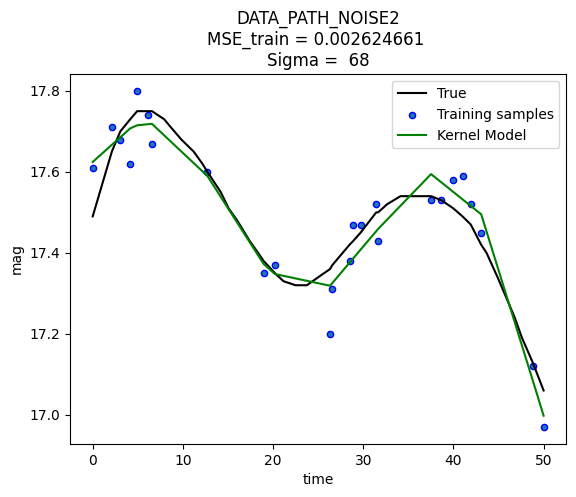

(50,)
(25,)


In [3]:
X = d_noise2[0]  #time
x = X.values.reshape(-1,1)
Y = d_noise2[1]  #mag_A
y = Y.values.reshape(-1,1)


sigma=68;

ones = []
for i in range(0,Y.size):
  ones.append(1)

#Do an array of ones
ones1 = np.array(ones)

#make de function K1 where
#ex = data
#n = number of points
#c = Centers of gaussians
#k = number of kernels
#d = kernels width
def K1(ex,n,c,km,d):
  matrix = [[0 for _ in range(n)] for _ in range(km)]
  for i in range(0,km):
    for j in range (0,n):
      matrix[i][j] = m.exp(-(abs(ex[j]-c[i]**2)/(d[j]**2)))
  return matrix


Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
Gram_matrix_M = np.asarray(Gram_matrix)
pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
alpha = pinvGram_matrix_M.dot(Y)
alphaT = np.transpose(alpha)
alphaTD = np.squeeze(alphaT)
h = alphaTD.dot(Gram_matrix_M)
hArray = np.squeeze(np.asarray(np.transpose(h)))

#Metrics
MSE_train = mean_squared_error(y,np.transpose(h))

#Plotting
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x, hArray, color='g', label="Kernel Model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE2\nMSE_train = {:.8} \nSigma =  {:}".format(MSE_train,sigma))
plt.show()
print(Y_test.shape)
print(hArray.shape)